In [3]:
import model as m
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import AdaBoostClassifier

In [4]:
#stop word sets specified for this data set
path = "../data/stop_words_news_groups/"
with open(path+"stop_words_no_numbers.txt", 'r') as content_file:
        content = content_file.read().replace(" ","").replace("\n","").split(",")
        stop_words_no_nums = frozenset(content)
with open(path+"stop_words_with_nums.txt", 'r') as content_file:
        content = content_file.read().replace(" ","").replace("\n","").split(",")
        stop_words_with_nums = frozenset(content)


In [5]:
clf_1 = m.Classifier(1,AdaBoostClassifier())

params_trial_1 = {
    'vect__max_features': (10000,50000),
    'vect__ngram_range': ((1, 1), (1, 2)),
    'tfidf__norm': ('l1','l2', None),
    'vect__stop_words' : [stop_words_no_nums, stop_words_with_nums,None],
    'clf__base_estimator': [DecisionTreeClassifier(max_depth=50)],
    'clf__n_estimators': [(10)],
    'clf__learning_rate': (0.8,1,1.2),
}

clf_1.fit(params_trial_1,5)

Performing grid search...
pipeline: ['vect', 'tfidf', 'clf']
Fitting 5 folds for each of 108 candidates, totalling 540 fits
done in 3323.731s

scores!
mean: 0.448 std: (+/-0.009) for {'clf__base_estimator': DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=50, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best'), 'clf__learning_rate': 0.8, 'clf__n_estimators': 10, 'tfidf__norm': 'l1', 'vect__max_features': 10000, 'vect__ngram_range': (1, 1), 'vect__stop_words': 0}
mean: 0.453 std: (+/-0.018) for {'clf__base_estimator': DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=50, max_features=None, max_leaf_nodes=None,
     

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  48 tasks      | elapsed:  5.9min
[Parallel(n_jobs=-1)]: Done 138 tasks      | elapsed: 15.7min
[Parallel(n_jobs=-1)]: Done 264 tasks      | elapsed: 28.4min
[Parallel(n_jobs=-1)]: Done 426 tasks      | elapsed: 44.6min
[Parallel(n_jobs=-1)]: Done 540 out of 540 | elapsed: 54.8min finished


In [8]:
clf_1.eval_best_n_params(0.8)
clf_1.eval_best_n_params(0.9)
clf_1.eval_best_n_params(0.95)

Finding most common params for the top 22 values
[{DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=50, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best'): 22}, {0.8: 20, 1: 2}, {10: 22}, {None: 5, 'l2': 8, 'l1': 9}, {10000: 8, 50000: 14}, {(1, 1): 11, (1, 2): 11}, {1: 11, 0: 11}]
Finding most common params for the top 11 values
[{DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=50, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, pr

Evaluation on test set:

Accuracy Score : 0.4225969198088157
Precision Score : 0.4225969198088157
Recall Score : 0.4225969198088157
F1 Score : 0.4225969198088157
Confusion Matrix
[[ 90   5   4   1   3   1   5  32  15   5   5   5   6  14  15  47  15  12
   15  24]
 [  2 169  18  26  16  26   7  24   7   5   5  10  28  12  15   3   7   0
    5   4]
 [  4  44 145  35  12  28   6  41  12   5   2   6  22   6  10   1   3   4
    5   3]
 [  4  16  44 147  36  12  14  30   6   5   4   6  42  12   7   1   4   1
    1   0]
 [  0  25  10  31 152   4  16  44   8   2   6   3  35  18  12   3   6   3
    3   4]
 [  2  39  31  16   9 181   4  33   6   4   4   5  23  12  11   5   2   3
    4   1]
 [  0  12   8  32  21   0 197  40   8  12   5   3  27   7  12   2   2   1
    1   0]
 [  3   6   5   4   5   5  11 215  27   6   6   2  33  16  14   3  14   3
   13   5]
 [  5   6   6   2   7   0  10  78 188  12   3   4  21  11   9   9   6   6
    5  10]
 [  6   7   5   4   3   2   6  57  10 173  56   1  14  1

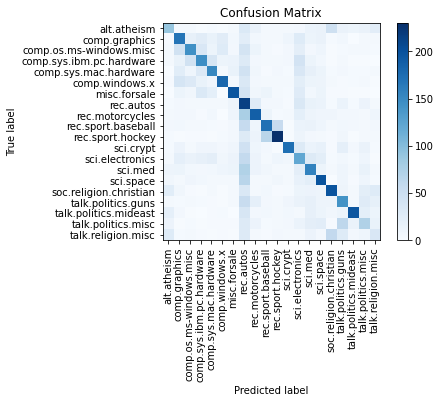

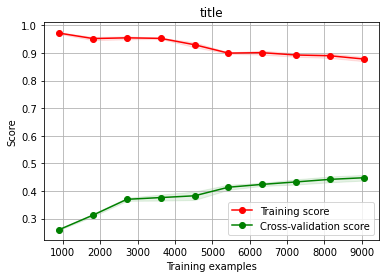

In [9]:
clf_1.eval_on_test([],False)
clf_1.learning_curve([0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1.0])


In [10]:
clf_2 = m.Classifier(1,AdaBoostClassifier())


params_trial_2 = {
    'vect__max_features': [(10000)],
    'vect__ngram_range': ((1, 1), (1, 2)),
    'tfidf__norm': ('l1','l2'),
    'vect__stop_words' : [stop_words_no_nums, stop_words_with_nums],
    'clf__base_estimator': [DecisionTreeClassifier(max_depth=50),DecisionTreeClassifier(max_depth=100)],
    'clf__n_estimators': [(10)],
    'clf__learning_rate': (0.6,0.7,0.8),
}

clf_2.fit(params_trial_2,5)


Performing grid search...
pipeline: ['vect', 'tfidf', 'clf']
Fitting 5 folds for each of 48 candidates, totalling 240 fits
done in 1439.005s

scores!
mean: 0.462 std: (+/-0.016) for {'clf__base_estimator': DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=50, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best'), 'clf__learning_rate': 0.6, 'clf__n_estimators': 10, 'tfidf__norm': 'l1', 'vect__max_features': 10000, 'vect__ngram_range': (1, 1), 'vect__stop_words': 0}
mean: 0.452 std: (+/-0.011) for {'clf__base_estimator': DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=50, max_features=None, max_leaf_nodes=None,
      

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  48 tasks      | elapsed:  3.7min
[Parallel(n_jobs=-1)]: Done 138 tasks      | elapsed: 12.4min
[Parallel(n_jobs=-1)]: Done 240 out of 240 | elapsed: 23.1min finished


In [12]:
clf_2.eval_best_n_params(0.8)
clf_2.eval_best_n_params(0.9)
clf_2.eval_best_n_params(0.95)

Finding most common params for the top 10 values
[{DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=50, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best'): 1, DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=100, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best'): 9}, {0.6: 2, 0.8: 5, 0.7: 3}, {10: 10}, {'l1': 9, 'l2': 1}, {10000: 10}, {(1, 1): 6, (1, 2): 

Evaluation on test set:

Accuracy Score : 0.4229952203929899
Precision Score : 0.4229952203929899
Recall Score : 0.4229952203929899
F1 Score : 0.4229952203929899
Confusion Matrix
[[ 76   8   2   1   2   1   4  28  17  14   4  10   9   8  17  48  15   6
   22  27]
 [  2 163  27  22  14  34  16  21  13  11   5   4  19   3  12   5   1   8
    6   3]
 [  5  38 134  34  21  35   8  35  15  20   2   2  14   7   7   4   6   3
    1   3]
 [  3  33  35 137  32  10  18  23  11   4   2   9  41  13   6   1   2   2
    6   4]
 [  4  17  17  27 149  10  22  32  14   7   4   5  41  14   8   0   3   2
    5   4]
 [  4  38  44   9  10 181   6  20  12   7   4   1  16  10   8   4   7   5
    5   4]
 [  1  12  10  23  19   9 201  39  13  10   5   1  12   4  10   3   4   4
    6   4]
 [  6   6   3   3  13   3  13 206  40  11   9   3  33   6   9   4   9   3
   14   2]
 [  7   3   4   1   9   3  10  53 209  22   4   4  12   9   8   4   6  10
   16   4]
 [  6   5   2   7   4   4   5  35  15 210  42   1   9  1

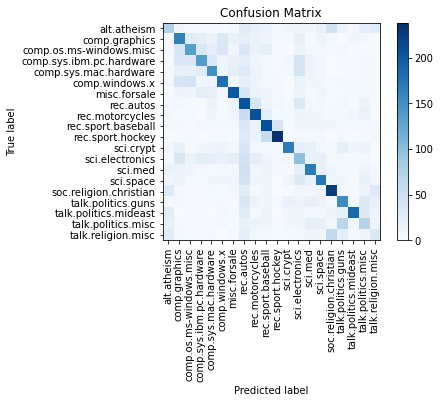

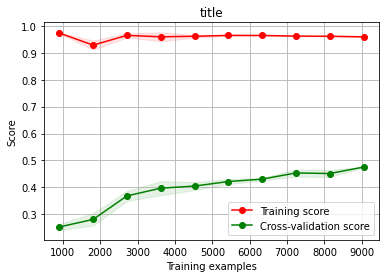

In [13]:
clf_2.eval_on_test([],False)
clf_2.learning_curve([0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1.0])


In [14]:
clf_3 = m.Classifier(1,AdaBoostClassifier())


params_trial_3 = {
    'vect__max_features': (10000,100000,200000),
    'vect__ngram_range': ((1, 1), (1, 2)),
    'tfidf__norm': [('l1')],
    'vect__stop_words' : [stop_words_no_nums, stop_words_with_nums],
    'clf__base_estimator': [DecisionTreeClassifier(max_depth=50),DecisionTreeClassifier(max_depth=100)],
    'clf__n_estimators': [(10)],
    'clf__learning_rate': (0.8,0.85,0.9),
}

clf_3.fit(params_trial_3,5)



Performing grid search...
pipeline: ['vect', 'tfidf', 'clf']
Fitting 5 folds for each of 72 candidates, totalling 360 fits
done in 3569.894s

scores!
mean: 0.448 std: (+/-0.016) for {'clf__base_estimator': DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=50, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best'), 'clf__learning_rate': 0.8, 'clf__n_estimators': 10, 'tfidf__norm': 'l1', 'vect__max_features': 10000, 'vect__ngram_range': (1, 1), 'vect__stop_words': 0}
mean: 0.446 std: (+/-0.014) for {'clf__base_estimator': DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=50, max_features=None, max_leaf_nodes=None,
      

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  48 tasks      | elapsed:  5.5min
[Parallel(n_jobs=-1)]: Done 138 tasks      | elapsed: 16.6min
[Parallel(n_jobs=-1)]: Done 264 tasks      | elapsed: 38.2min
[Parallel(n_jobs=-1)]: Done 360 out of 360 | elapsed: 58.6min finished


In [ ]:
clf_3.eval_best_n_params(0.8)
clf_3.eval_best_n_params(0.9)
clf_3.eval_best_n_params(0.95)

In [ ]:
clf_3.eval_on_test([],False)
clf_3.learning_curve([0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1.0])
